# Commodity Prices in USA

* [Introduction](#int)
* [Questions](#q)
    1. [Is there a correlation between gold prices and various commodity prices?](#q1)
    2. [Is there a correlation between gold prices and metal prices?](#q2)
    3. [How did food prices change over the years?](#q3)
    4. [What is the cheapest commodity in total?](#q4)
    5. [What is the most expensive commodity in total?](#q5)
    5. [What was the most expensive commodity each year?](#q6)


<h3 id="int">Introduction</h3>

* The dataset that I used is monthly prices of commodities in USA between 1992 and 2016.
* Indexes are calculated with their prices in 2005 as 100.

In [1]:
# packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
# load data
golddf = pd.read_csv("../input/gold-prices/monthly_csv.csv")
commdf = pd.read_csv("../input/usa-commodity-prices/commodity-prices-2016.csv")

In [3]:
# clean data
commdf["Date"] = pd.to_datetime(commdf["Date"])
golddf['Date'] = golddf['Date'].astype(str) + '-01' 
golddf["Date"] = pd.to_datetime(golddf["Date"])
# use only years from 1992 to 2016
commdf = commdf.loc[(commdf['Date'] > "1991-12-01") & (commdf['Date'] <= "2016-02-02")]
golddf = golddf.loc[(golddf['Date'] > "1991-12-01") & (golddf['Date'] <= "2016-02-02")]
df = commdf.loc[: , "Coffee Other Mild Arabicas":"Coffee Robusta"]
commdf['Coffe avg'] = df.mean(axis=1)
df = commdf.iloc[: , 31:34]
commdf['Natural gas avg'] = df.mean(axis=1)
df = commdf.iloc[: , 53:56]
commdf['Sugar avg'] = df.mean(axis=1)
df = commdf.iloc[: , 28:30]
commdf['Logs avg'] = df.mean(axis=1)
df = commdf.iloc[: , 61:63]
commdf['Wool avg'] = df.mean(axis=1)
prices = commdf.merge(golddf)
prices = prices.iloc[:, np.r_[0:16, 19:28, 30, 34, 39:47, 49:53, 56:61, 63:70]]
prices = prices.rename(columns={'China import Iron Ore Fines 62% FE spot': 'Iron ore', "Price": "Gold"})
prices

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Tin,Uranium,Wheat,Zinc,Coffe avg,Natural gas avg,Sugar avg,Logs avg,Wool avg,Gold
0,1992-01-01,52.876718,83.329026,96.099228,97.986897,78.674293,70.430080,87.013457,58.451712,35.061062,...,5483.091375,8.750000,169.954773,1157.659180,61.214315,2.540167,19.990967,157.330032,458.206167,354.436
1,1992-02-01,53.020784,83.705932,95.672401,98.213935,72.211682,71.618822,86.862877,60.607861,35.068909,...,5612.100129,7.900000,177.130600,1135.475098,55.549740,2.370000,19.656671,163.033005,498.862418,353.853
2,1992-03-01,52.736939,83.715638,94.918650,97.461684,71.444087,72.399683,88.126997,61.039659,34.613325,...,5637.045410,7.750000,169.350739,1217.772705,56.601433,2.363333,19.427470,159.071976,504.552674,344.641
3,1992-04-01,54.270214,84.333553,92.970648,95.456964,70.019646,75.609383,94.438511,62.008882,36.682118,...,5836.249728,7.750000,159.931198,1304.949951,53.890245,2.393500,20.009883,165.201622,509.909818,338.728
4,1992-05-01,55.577815,85.305726,94.400447,97.297458,67.658345,76.119316,95.535433,62.094826,38.185955,...,6113.158019,7.550000,149.689117,1377.736816,49.523251,2.492767,20.249191,165.757271,515.213486,337.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2015-10-01,103.466916,126.907455,137.852216,133.899141,174.342772,115.852355,112.924508,117.967173,89.753388,...,15794.613636,36.955163,165.388254,1724.340909,121.276591,6.231735,21.559998,203.726433,920.468223,1157.123
286,2015-11-01,97.467668,122.040427,134.654483,130.371612,174.189364,109.299203,109.512921,109.144832,83.091752,...,14745.285714,35.934567,157.741528,1583.309524,118.783684,5.782491,21.929929,196.984469,952.553188,1088.388
287,2015-12-01,90.734792,121.669445,136.304358,132.386700,172.467981,106.886989,109.422638,105.055460,72.636947,...,14691.690476,35.099756,163.793245,1527.785714,117.918750,5.960933,21.918865,206.000713,969.115325,1068.317
288,2016-01-01,83.150947,121.295627,136.615213,134.186870,159.031071,105.821596,108.755324,103.702530,60.834986,...,13808.075000,34.622671,164.557592,1520.362500,114.141316,5.454811,21.357439,209.569157,972.576233,1095.655


In [4]:
# get 2005 prices for creating index
prices2005 = prices.loc[(prices['Date'] > "2004-12-01") & (prices['Date'] <= "2005-12-02")]
prices2005

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Tin,Uranium,Wheat,Zinc,Coffe avg,Natural gas avg,Sugar avg,Logs avg,Wool avg,Gold
156,2005-01-01,86.605324,95.026969,94.920266,94.882800,95.266120,95.134747,97.897977,93.138834,81.678369,...,7705.650000,20.535714,122.391404,1245.550000,73.369474,5.677333,20.259011,187.874468,643.852921,424.080
157,2005-02-01,88.887149,97.449290,98.435672,97.567011,106.454221,96.452963,97.412712,95.759725,83.877999,...,8106.325000,21.200000,123.129961,1323.105000,83.422188,5.766140,20.357175,185.052792,641.994145,423.430
158,2005-03-01,97.314109,101.981438,103.466506,102.595760,111.504299,100.481399,101.493363,99.750445,94.583559,...,8442.238095,21.844444,130.631723,1373.957143,92.673810,6.056667,20.394746,186.409014,636.883105,434.355
159,2005-04-01,96.612423,99.268631,100.421136,100.160401,102.827960,98.104507,98.645777,97.713541,95.058449,...,8133.809524,23.144444,120.064305,1297.809524,91.035526,6.575238,20.415084,188.965608,636.432978,429.140
160,2005-05-01,93.548670,98.840995,100.886452,100.688132,102.717134,96.774917,99.249459,94.987527,90.452476,...,8099.250000,28.250000,119.154462,1245.535000,92.335476,6.401270,20.430031,186.939886,630.310636,422.903
161,2005-06-01,99.956917,99.688351,101.606672,101.244895,104.946205,97.750691,99.601137,96.414092,100.114037,...,7604.363636,29.000000,122.473322,1273.118182,91.449500,6.414848,20.105883,191.071529,618.958050,430.302
162,2005-07-01,103.034830,99.744287,101.870980,102.250122,98.371150,97.596155,99.417219,96.280778,104.959911,...,7180.928571,29.277778,132.784613,1196.857143,84.511750,6.945167,19.797768,194.085938,627.815587,424.745
163,2005-08-01,109.146338,100.493979,100.313861,100.633333,97.364843,100.675912,101.422526,100.136625,114.208269,...,7228.136364,29.650000,131.558302,1300.750000,82.014348,7.624928,20.061327,198.130177,600.353505,437.773
164,2005-09-01,109.309720,100.067785,99.553437,100.116455,94.356257,100.587319,101.539391,99.899627,114.716572,...,6770.581818,30.431250,137.211350,1396.663636,74.122857,8.752000,20.564812,200.920258,582.626991,455.936
165,2005-10-01,106.773426,101.027158,99.748559,100.316600,94.505010,102.318647,101.554637,102.870500,110.135192,...,6415.476190,32.750000,142.941612,1483.219048,78.463571,9.534603,20.886893,196.538782,561.702240,470.107


In [5]:
# gold index is calculated
goldbase = prices2005["Gold"].mean()
prices["Gold index"] = prices["Gold"]*100/goldbase
prices

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Uranium,Wheat,Zinc,Coffe avg,Natural gas avg,Sugar avg,Logs avg,Wool avg,Gold,Gold index
0,1992-01-01,52.876718,83.329026,96.099228,97.986897,78.674293,70.430080,87.013457,58.451712,35.061062,...,8.750000,169.954773,1157.659180,61.214315,2.540167,19.990967,157.330032,458.206167,354.436,79.665517
1,1992-02-01,53.020784,83.705932,95.672401,98.213935,72.211682,71.618822,86.862877,60.607861,35.068909,...,7.900000,177.130600,1135.475098,55.549740,2.370000,19.656671,163.033005,498.862418,353.853,79.534478
2,1992-03-01,52.736939,83.715638,94.918650,97.461684,71.444087,72.399683,88.126997,61.039659,34.613325,...,7.750000,169.350739,1217.772705,56.601433,2.363333,19.427470,159.071976,504.552674,344.641,77.463924
3,1992-04-01,54.270214,84.333553,92.970648,95.456964,70.019646,75.609383,94.438511,62.008882,36.682118,...,7.750000,159.931198,1304.949951,53.890245,2.393500,20.009883,165.201622,509.909818,338.728,76.134877
4,1992-05-01,55.577815,85.305726,94.400447,97.297458,67.658345,76.119316,95.535433,62.094826,38.185955,...,7.550000,149.689117,1377.736816,49.523251,2.492767,20.249191,165.757271,515.213486,337.039,75.755245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2015-10-01,103.466916,126.907455,137.852216,133.899141,174.342772,115.852355,112.924508,117.967173,89.753388,...,36.955163,165.388254,1724.340909,121.276591,6.231735,21.559998,203.726433,920.468223,1157.123,260.083066
286,2015-11-01,97.467668,122.040427,134.654483,130.371612,174.189364,109.299203,109.512921,109.144832,83.091752,...,35.934567,157.741528,1583.309524,118.783684,5.782491,21.929929,196.984469,952.553188,1088.388,244.633707
287,2015-12-01,90.734792,121.669445,136.304358,132.386700,172.467981,106.886989,109.422638,105.055460,72.636947,...,35.099756,163.793245,1527.785714,117.918750,5.960933,21.918865,206.000713,969.115325,1068.317,240.122408
288,2016-01-01,83.150947,121.295627,136.615213,134.186870,159.031071,105.821596,108.755324,103.702530,60.834986,...,34.622671,164.557592,1520.362500,114.141316,5.454811,21.357439,209.569157,972.576233,1095.655,246.267088


<h3 id="q">Questions</h3>
<h4 id="q1">1. Is there a correlation between gold prices and various commodity prices?</h4>

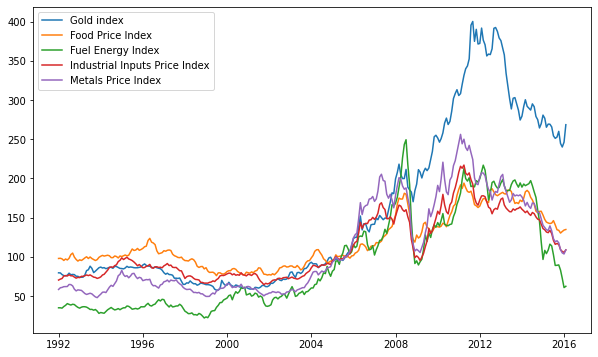

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(prices["Date"], prices["Gold index"], label = "Gold index")
plt.plot(prices["Date"], prices["Food Price Index"], label = "Food Price Index")
plt.plot(prices["Date"], prices["Fuel Energy Index"], label = "Fuel Energy Index")
plt.plot(prices["Date"], prices["Industrial Inputs Price Index"], label = "Industrial Inputs Price Index")
plt.plot(prices["Date"], prices["Metals Price Index"], label = "Metals Price Index")
plt.legend()
plt.show()

* Most similar index is metals price index
* Gold prices are rising more than any commodity after 2008.

<h4 id="q2">2. Is there a correlation between gold prices and metal prices?</h4>

In [7]:
# other metal indexes are calculated
prices["Aluminum index"] = prices["Aluminum"]*100/(prices2005["Aluminum"].mean())
prices["Copper index"] = prices["Copper"]*100/(prices2005["Copper"].mean())
prices["Iron ore index"] = prices["Iron ore"]*100/(prices2005["Iron ore"].mean())
prices["Lead index"] = prices["Lead"]*100/(prices2005["Lead"].mean())
prices["Nickel index"] = prices["Nickel"]*100/(prices2005["Nickel"].mean())
prices["Tin index"] = prices["Tin"]*100/(prices2005["Tin"].mean())
prices["Zinc index"] = prices["Zinc"]*100/(prices2005["Zinc"].mean())
prices

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Wool avg,Gold,Gold index,Aluminum index,Copper index,Iron ore index,Lead index,Nickel index,Tin index,Zinc index
0,1992-01-01,52.876718,83.329026,96.099228,97.986897,78.674293,70.430080,87.013457,58.451712,35.061062,...,458.206167,354.436,79.665517,62.153030,58.495382,50.907150,52.923692,50.962452,74.243834,83.855079
1,1992-02-01,53.020784,83.705932,95.672401,98.213935,72.211682,71.618822,86.862877,60.607861,35.068909,...,498.862418,353.853,79.534478,66.863476,60.081475,50.907150,51.904997,53.377311,75.990678,82.248175
2,1992-03-01,52.736939,83.715638,94.918650,97.461684,71.444087,72.399683,88.126997,61.039659,34.613325,...,504.552674,344.641,77.463924,67.456616,60.704167,50.907150,53.691116,50.281150,76.328450,88.209405
3,1992-04-01,54.270214,84.333553,92.970648,95.456964,70.019646,75.609383,94.438511,62.008882,36.682118,...,509.909818,338.728,76.134877,69.303605,60.224942,50.907150,54.728371,50.196537,79.025777,94.524091
4,1992-05-01,55.577815,85.305726,94.400447,97.297458,67.658345,76.119316,95.535433,62.094826,38.185955,...,515.213486,337.039,75.755245,68.755632,60.364973,50.907150,53.444863,49.628091,82.775256,99.796410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2015-10-01,103.466916,126.907455,137.852216,133.899141,174.342772,115.852355,112.924508,117.967173,89.753388,...,920.468223,1157.123,260.083066,79.793588,141.876741,187.623298,176.536221,69.812958,213.867068,124.902688
286,2015-11-01,97.467668,122.040427,134.654483,130.371612,174.189364,109.299203,109.512921,109.144832,83.091752,...,952.553188,1088.388,244.633707,77.236608,130.556552,164.218800,166.091674,62.555483,199.658637,114.687076
287,2015-12-01,90.734792,121.669445,136.304358,132.386700,172.467981,106.886989,109.422638,105.055460,72.636947,...,969.115325,1068.317,240.122408,78.778797,126.175438,140.890601,175.147598,58.924719,198.932930,110.665207
288,2016-01-01,83.150947,121.295627,136.615213,134.186870,159.031071,105.821596,108.755324,103.702530,60.834986,...,972.576233,1095.655,246.267088,77.931532,121.631821,146.753401,168.950423,57.567967,186.968329,110.127506


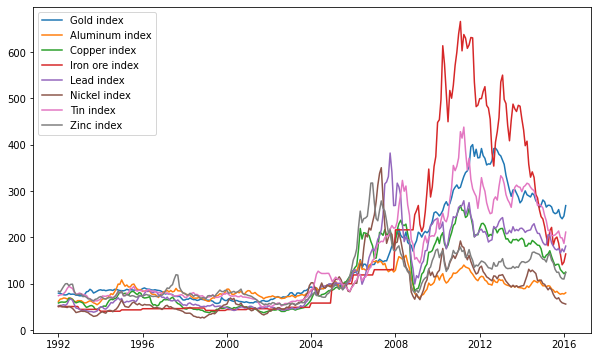

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(prices["Date"], prices["Gold index"], label = "Gold index")
plt.plot(prices["Date"], prices["Aluminum index"], label = "Aluminum index")
plt.plot(prices["Date"], prices["Copper index"], label = "Copper index")
plt.plot(prices["Date"], prices["Iron ore index"], label = "Iron ore index")
plt.plot(prices["Date"], prices["Lead index"], label = "Lead index")
plt.plot(prices["Date"], prices["Nickel index"], label = "Nickel index")
plt.plot(prices["Date"], prices["Tin index"], label = "Tin index")
plt.plot(prices["Date"], prices["Zinc index"], label = "Zinc index")

plt.legend()
plt.show()

* Most correlation is between gold and tin. 
* Iron actually rises even more then gold after 2009.

<h4 id="q3">3. How did food prices change over the years?</h4>

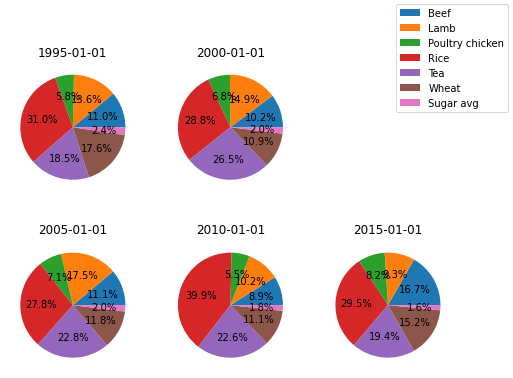

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplot(2, 3, 1)
plt.gca().set_title("1995-01-01")
plt.pie(prices[["Beef", "Lamb", "Poultry chicken", "Rice", "Tea", "Wheat", "Sugar avg"]].loc[prices['Date'] == "1995-01-01"].T.iloc[:,0]
, autopct='%1.1f%%')
plt.subplot(2, 3, 2)
plt.gca().set_title("2000-01-01")
plt.pie(prices[["Beef", "Lamb", "Poultry chicken", "Rice", "Tea", "Wheat", "Sugar avg"]].loc[prices['Date'] == "2000-01-01"].T.iloc[:,0]
, autopct='%1.1f%%')
plt.subplot(2, 3, 4)
plt.gca().set_title("2005-01-01")
plt.pie(prices[["Beef", "Lamb", "Poultry chicken", "Rice", "Tea", "Wheat", "Sugar avg"]].loc[prices['Date'] == "2005-01-01"].T.iloc[:,0]
, autopct='%1.1f%%')
plt.subplot(2, 3, 5)
plt.gca().set_title("2010-01-01")
plt.pie(prices[["Beef", "Lamb", "Poultry chicken", "Rice", "Tea", "Wheat", "Sugar avg"]].loc[prices['Date'] == "2010-01-01"].T.iloc[:,0]
, autopct='%1.1f%%')
plt.subplot(2, 3, 6)
plt.gca().set_title("2015-01-01")
plt.pie(prices[["Beef", "Lamb", "Poultry chicken", "Rice", "Tea", "Wheat", "Sugar avg"]].loc[prices['Date'] == "2015-01-01"].T.iloc[:,0]
, autopct='%1.1f%%')
plt.figlegend(labels=("Beef", "Lamb", "Poultry chicken", "Rice", "Tea", "Wheat", "Sugar avg"))
plt.show()

* Food commodities and their proportions every 5 years.
* It doesn’t chance much.
* Only in 2010 the rice prices has risen a bit.
* Also beef and wheat is more expensive in recent years.

<h4 id="q4">4. What is the cheapest commodity in total?? </h4>

<BarContainer object of 5 artists>

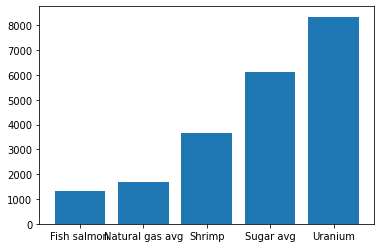

In [10]:
tsum = prices.sum(numeric_only=True).sort_values()[:5]
lsum = prices.sum(numeric_only=True).sort_values(ascending=False)[:5]

tsum = {"Name":list(tsum.index), "Sum":list(tsum)}
tsum = pd.DataFrame(tsum)

lsum = {"Name":list(lsum.index), "Sum":list(lsum)}
lsum = pd.DataFrame(lsum)

plt.bar(tsum["Name"], tsum["Sum"])

<h4 id="q5">5. What is the most expensive commodity in total? </h4>

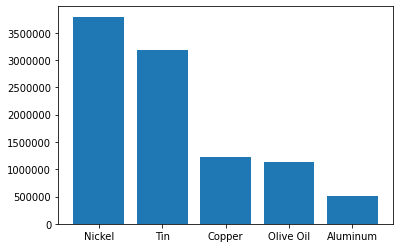

In [11]:
plt.bar(lsum["Name"], lsum["Sum"])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<h4 id="q6">6. What was the most expensive commodity each year? </h4>

In [12]:
# calculating each year
yearlyp = prices.groupby(prices.Date.dt.year).transform('mean').drop_duplicates()
pd.set_option('display.max_rows', None)
for i in range(1,59):
    yearlyp.iloc[:,i] = pd.to_numeric(yearlyp.iloc[:,i])
# most expensive every year
yearlyp.iloc[:,1:].idxmax(axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1404: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fast_path = lambda group: getattr(group, func)(*args, **kwargs)


0      Nickel
12     Nickel
24     Nickel
36     Nickel
48     Nickel
60     Nickel
72        Tin
84     Nickel
96     Nickel
108    Nickel
120    Nickel
132    Nickel
144    Nickel
156    Nickel
168    Nickel
180    Nickel
192    Nickel
204    Nickel
216    Nickel
228       Tin
240       Tin
252       Tin
264       Tin
276       Tin
288       Tin
dtype: object

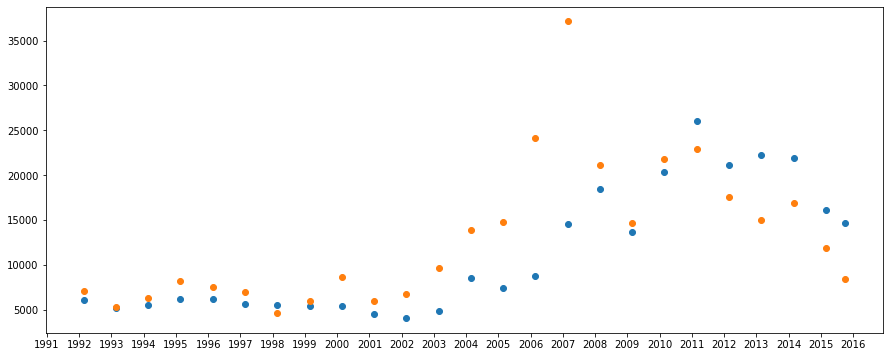

In [13]:
# as a graph
pd.set_option('display.max_rows', 6)
yearlyp = yearlyp[["Date","Tin","Nickel"]]
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(yearlyp["Date"], yearlyp[["Tin","Nickel"]], 'o')
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=365))
plt.show()

* There is an interesting spike in 2007 in nickel.
* In resent years tin is more expensive.